In [1]:
import pandas as pd
import os
import glob

# Specify the path to your main folder containing subfolders with CSV files
main_path = r'C:\ResearchFiles\AllFiles_Cleaned'

# Recursively search for all CSV files in the subfolders
all_files = [f for f in glob.glob(os.path.join(main_path, "**/*.csv"), recursive=True)]

# Combine all files into a single DataFrame
df_list = []
for filename in all_files:
    df = pd.read_csv(filename)
    df['smart_plug'] = os.path.basename(filename).split('_')[1]  # Add a column for the smart plug identifier
    # Optionally, add a column for the building by extracting from the path
    df['building'] = os.path.basename(os.path.dirname(filename))
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

In [2]:
# Remove unneccessary columns
combined_df = combined_df.drop(columns = ['analogInput_2', 'analogInput_4', 'analogInput_5', 'binaryInput_3', 'binaryValue_1', 'building'])

# Convert timestamp column to datetime
combined_df['time'] = pd.to_datetime(combined_df['time'])

# Rename the power consumption column more appropriately
combined_df = combined_df.rename(columns = {'analogInput_3': 'power_consumption (mW)'})

# Set the timestamp as index for easier use when graphing
combined_df.set_index('time', inplace=True)

In [3]:
combined_df

,power_consumption (mW),smart_plug
time,,
2023-09-14 18:16:00,30392.714286,180940
2023-09-14 18:17:00,31416.000000,180940
2023-09-14 18:18:00,30044.000000,180940
2023-09-14 18:19:00,30740.000000,180940
2023-09-14 18:20:00,29952.000000,180940
...,...,...
2024-06-10 23:55:00,20587.000000,657128
2024-06-10 23:56:00,21240.000000,657128
2024-06-10 23:57:00,20760.000000,657128


In [4]:
# Add a new column for the day of the week
combined_df['Day of Week'] = combined_df.index.day_name()

# Convert all power consumption values from milliWatt to KW/h and rename appropriately
combined_df['power_consumption (mW)'] = combined_df['power_consumption (mW)'] / 1_000_000
combined_df.rename(columns = {'power_consumption (mW)': 'power_consumption (KW)'}, inplace=True)

In [5]:
# Group by the day of the week and calculate the mean for each day
daily_avg = combined_df.groupby('Day of Week').mean()

C:\Users\vaugh\AppData\Local\Temp\ipykernel_14612\3428496720.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_avg = combined_df.groupby('Day of Week').mean()


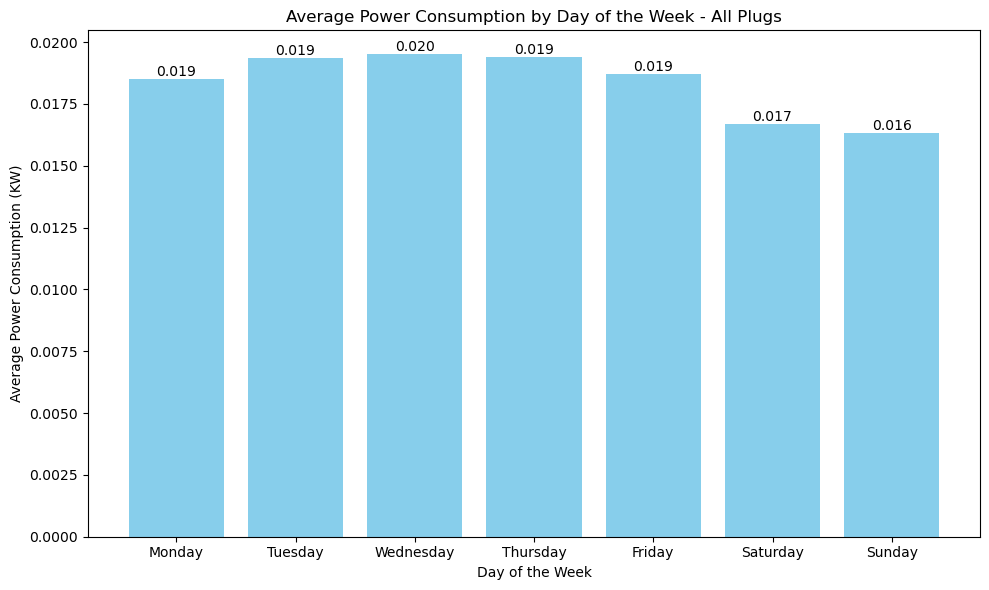

In [7]:
# Creating a bar graph that shows the average power consumption across the entire dataset for each day of the week

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the order of days to ensure the bars appear in the correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the chart
plt.figure(figsize=(10, 6))
bars = plt.bar(day_order, daily_avg.loc[day_order, 'power_consumption (KW)'], color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Power Consumption (KW)')
plt.title(f'Average Power Consumption by Day of the Week - All Plugs')

# Adding the monthly consumption values on top of each bar for better visual presentation
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()